# Download Solar Prediction Images

Use this script to download images and create a movie of a camera during a day.

In [1]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 8.0)
from joblib import Parallel, delayed
import numpy as np
import os
import pandas as pd
import CameraNetwork
import CameraNetwork.global_settings as gs
import cv2
import Image
import ImageDraw
import pickle
import time
from tqdm import tqdm_notebook
import traceback

/home/amitibo/code/cameranetwork/CameraNetwork/transformation_matrices.py:1934: UserWarning: failed to import module _transformations
  warnings.warn("failed to import module %s" % name)


In [18]:
BASE_PATH = "/home/amitibo/data/experiment_forecast_2017_08/"
#BASE_PATH = "/VISL2_net/amitibo/experiment_forecast_2017_08/"

## Connect to Network

In [3]:
c = CameraNetwork.CLIclient()
proxy_params = CameraNetwork.retrieve_proxy_parameters()
c.start(proxy_params)
time.sleep(3)
SERVERS = c.client_instance.servers
print SERVERS

['110', '111', '112', '115', '116', '117', '119', '120', '121', '122', '123', '219', 'cam_109L', 'cam_109bL', 'cam_109cL', 'cam_110L', 'cam_110bL', 'cam_111L', 'cam_111bL', 'cam_111cL', 'cam_112L', 'cam_112bL', 'cam_113L', 'cam_114L', 'cam_114bL', 'cam_114cL', 'cam_115L', 'cam_115bL', 'cam_116L', 'cam_116bL', 'cam_116cL', 'cam_117L', 'cam_118L', 'cam_118bL', 'cam_119L', 'cam_119bL', 'cam_120L']


## Settings

In [4]:
CAM = 219
DAY = 12
MONTH = 8
HDR = '3'
JPEG_QUALITY = 100

#
# For network camera
#
#RESOLUTION = 301
#VIDEO_RESOLUTION = (301, 301)

#
# For solar camera
#
RESOLUTION = 300
VIDEO_RESOLUTION = (400, 300)

ADD_TIMER_OVERLAY = True

### Download Test Image

In [4]:
df = c.query(
    server_id='{}'.format(CAM),
    query_day='{:02}/{}/2017'.format(MONTH, DAY),
    force=True
)[0]
print("Camera {} captured {} images on this day.".format(CAM, df.shape[0]))

Camera 219 captured 749 images on this day.


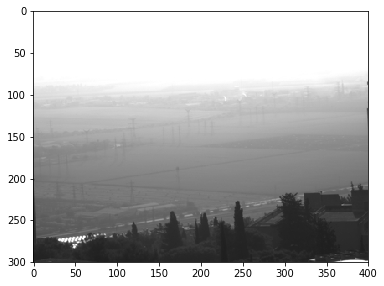

In [5]:
ind = df.loc[(slice(None), HDR), :].index[100]
img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
plt.figure(figsize=(6, 6))
plt.imshow(img)

In [55]:
df = c.query(
    server_id='{}'.format(123),
    query_day='{:02}/{}/2017'.format(MONTH, DAY),
    force=True
)[0]
print("Camera {} captured {} images on this day.".format(123, df.shape[0]))

Camera 219 captured 3342 images on this day.


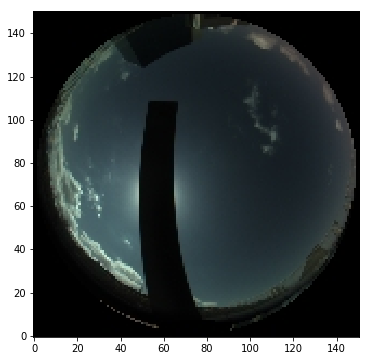

In [64]:
ind = df.loc[(slice(None), "3"), :].index[501]
img = c.seek('{}'.format(123), ind[0], ind[1], JPEG_QUALITY, 151)[0][0]
plt.figure(figsize=(6, 6))
plt.imshow(img, origin="bottom")

In [62]:
img.dtype

dtype('uint8')

## Download Images

### First Download from the Solar Camera

In [121]:
CAM = 219
DAY = 16
MONTH = 8
HDR = '0'
JPEG_QUALITY = 100

#
# For network camera
#
#RESOLUTION = 301
#VIDEO_RESOLUTION = (301, 301)

#
# For solar camera
#
RESOLUTION = 300
VIDEO_RESOLUTION = (400, 300)

ADD_TIMER_OVERLAY = True

In [8]:
df = c.query(
    server_id='{}'.format(CAM),
    query_day='{:02}/{}/2017'.format(MONTH, DAY),
    force=True
)[0]
print("Camera {} captured {} images on this day.".format(CAM, df.shape[0]))

Camera 219 captured 853 images on this day.


In [9]:
dst_path = os.path.join(BASE_PATH, "cam_{}".format(CAM), "2017_{}_{:02}".format(MONTH, DAY))
if not os.path.exists(dst_path):
    os.makedirs(dst_path)

In [10]:
rows = []
for ind in tqdm_notebook(df.loc[(slice(None), HDR), :].index):
    try:
        row = df.loc[ind]
        
        img_name = os.path.split(row["path"])[1][:-4] + ".jpg"
        img_path = os.path.join(dst_path, img_name)
        
        img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
        img = Image.fromarray(img)
        img.save(img_path, format='JPEG', subsampling=0, quality=100)
        
        row["path"] = img_path
        rows.append(row)

    except Exception, e:
        traceback.print_exc() 

Widget Javascript not detected.  It may not be installed or enabled properly.


/home/amitibo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
df2 = pd.DataFrame(rows)
df2.to_pickle(os.path.join(dst_path, "df.pkl"))

### Same as above but in a loop

In [15]:
CAM = 219
MONTH = 9
HDR = '0'
JPEG_QUALITY = 100

#
# For solar camera
#
RESOLUTION = 300

for DAY in tqdm_notebook(range(7, 8)):
    #
    # Get the list of images
    #
    try:
        df = c.query(
            server_id='{}'.format(CAM),
            query_day='{:02}/{}/2017'.format(MONTH, DAY),
            force=True
        )[0]
    except Exception, e:
        traceback.print_exc()
        continue

    print("Camera {} captured {} images on day {}.".format(CAM, df.shape[0], DAY))

    #
    # Prepare the destination folder.
    #
    dst_path = os.path.join(DST_PATH, "cam_{}".format(CAM), "2017_{}_{:02}".format(MONTH, DAY))
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    #
    # Download the images.
    #
    rows = []
    for ind in tqdm_notebook(df.loc[(slice(None), HDR), :].index):
        try:
            row = df.loc[ind]

            img_name = os.path.split(row["path"])[1][:-4] + ".jpg"
            img_path = os.path.join(dst_path, img_name)

            img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
            img = Image.fromarray(img)
            img.save(img_path, format='JPEG', subsampling=0, quality=JPEG_QUALITY)

            row["path"] = img_path
            rows.append(row)

        except Exception, e:
            traceback.print_exc()

    #
    # Save a dataframe for the day.
    #
    df2 = pd.DataFrame(rows)
    df2.to_pickle(os.path.join(dst_path, "df.pkl"))

A Jupyter Widget

Traceback (most recent call last):
  File "<ipython-input-15-19dff47fbaf3>", line 19, in <module>
    force=True
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 489, in query
    force=force
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 387, in send_message
    "Server {} raised Exception:\n{}".format(server_id, args_answer[0])
Exception: Server 219 raised Exception:
Calling the cmd handler caused an error:
Traceback (most recent call last):
  File "/home/odroid/code/cameranetwork/CameraNetwork/server.py", line 320, in _on_request
    answer = yield cb(*args, **kwds)
  File "/usr/local/lib/python2.7/dist-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/usr/local/lib/python2.7/dist-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "/usr/local/lib/python2.7/dist-packages/tornado/gen.py", line 270, in wrapper
    result = func(*args, **kwargs)
  File "/home/odroid

Camera 219 captured 15 images on day 3.


A Jupyter Widget

/home/amitibo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Camera 219 captured 8 images on day 4.


A Jupyter Widget

Traceback (most recent call last):
  File "<ipython-input-15-19dff47fbaf3>", line 45, in <module>
    img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    resolution=resolution
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 387, in send_message
    "Server {} raised Exception:\n{}".format(server_id, args_answer[0])
Exception: Server 219 raised Exception:
Calling the cmd handler caused an error:
Traceback (most recent call last):
  File "/home/odroid/code/cameranetwork/CameraNetwork/server.py", line 320, in _on_request
    answer = yield cb(*args, **kwds)
  File "/usr/local/lib/python2.7/dist-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/usr/local/lib/python2.7/dist-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "/usr/local/lib/python2.7/dist-packages/tornado/gen.py",

Camera 219 captured 196 images on day 5.


A Jupyter Widget

Traceback (most recent call last):
  File "<ipython-input-15-19dff47fbaf3>", line 45, in <module>
    img = c.seek('{}'.format(CAM), ind[0], ind[1], JPEG_QUALITY, RESOLUTION)[0][0]
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    resolution=resolution
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 387, in send_message
    "Server {} raised Exception:\n{}".format(server_id, args_answer[0])
Exception: Server 219 raised Exception:
Calling the cmd handler caused an error:
Traceback (most recent call last):
  File "/home/odroid/code/cameranetwork/CameraNetwork/server.py", line 320, in _on_request
    answer = yield cb(*args, **kwds)
  File "/usr/local/lib/python2.7/dist-packages/tornado/gen.py", line 1015, in run
    value = future.result()
  File "/usr/local/lib/python2.7/dist-packages/tornado/concurrent.py", line 237, in result
    raise_exc_info(self._exc_info)
  File "/usr/local/lib/python2.7/dist-packages/tornado/gen.py",

Camera 219 captured 826 images on day 6.


A Jupyter Widget

## Download from the rest of the Cameras

In [19]:
remote_servers = [server_id for server_id in c.servers_list if not server_id.endswith("L")]
remote_servers = remote_servers[:-1]

In [20]:
remote_servers

['110', '111', '112', '116', '117', '119', '120', '121', '122', '123']

In [12]:
def download_images(client, server_id, day, month, hdr, resolution):
    #
    # Get the list of images.
    #
    try:
        df = client.query(
            server_id='{}'.format(server_id),
            query_day='{:02}/{}/2017'.format(month, day),
            force=True
        )[0]
    except Exception, e:
        traceback.print_exc()
        return
        
    print("Camera {} captured {} images on this day.".format(server_id, df.shape[0]))
    
    #
    # Setup the dst path.
    #
    dst_path = os.path.join(DST_PATH, "cam_{}".format(server_id), "2017_{}_{:02}".format(month, day))
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)
    
    #
    # Iterate the images.
    #
    rows = []
    for ind in df.loc[(slice(None), hdr), :].index:
        try:
            row = df.loc[ind]

            img_name = os.path.split(row["path"])[1][:-4] + ".jpg"
            data_name = os.path.split(row["path"])[1][:-4] + ".pkl"
            
            img_path = os.path.join(dst_path, img_name)
            data_path = os.path.join(dst_path, data_name)
            
            tries_cnt = 0
            for i in range(2):
                #
                # Try twice
                #
                try:
                    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
                    break
                except Exception, e:
                    if tries_cnt == 0:
                        print("Failed to download image from camera {} will try again:\n{}".format(server_id, traceback.format_exc()))
                        tries_cnt += 1
                        pass
                    else:
                        raise

            img = Image.fromarray(imgs[0])
            img.save(img_path, format='JPEG', subsampling=0, quality=100)

            with open(data_path, "wb") as f:
                pickle.dump(datas[0], f)

            row["path"] = img_path
            row["exposure"] = datas[0].exposure_us

            rows.append(row)
        except Exception, e:
            print("Failed twice to download image from camera {}:\n{}".format(server_id, traceback.format_exc()))

    #
    # Save the dataframe.
    #
    df2 = pd.DataFrame(rows)
    df2.to_pickle(os.path.join(dst_path, "df.pkl"))

In [21]:
#DAY = 14
MONTH = 9
HDR = '3'
JPEG_QUALITY = 100

#
# For solar camera
#
RESOLUTION = 300

In [ ]:
for day in range(15, 26):
    print("Downloading day: {}".format(day))
    Parallel(backend="threading", n_jobs=len(remote_servers))(
        delayed(download_images)(c, server_id, day, MONTH, HDR, RESOLUTION) for server_id in remote_servers)

Camera 120 captured 1888 images on this day.
Camera 123 captured 2640 images on this day.
Camera 112 captured 2643 images on this day.
Camera 117 captured 2639 images on this day.
Camera 116 captured 2571 images on this day.
Camera 110 captured 2643 images on this day.
Camera 119 captured 2204 images on this day.
Camera 121 captured 2636 images on this day.


/home/amitibo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/amitibo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Camera 111 captured 2623 images on this day.
Failed to download image from camera 120 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 387, in send_message
    "Server {} raised Exception:\n{}".format(server_id, args_answer[0])
Exception: Server 120 raised Exception:
Calling the cmd handler caused an error:
Traceback (most recent call last):
  File "/home/odroid/code/cameranetwork/CameraNetwork/server.py", line 414, in _on_request
    answer = yield cb(*args, **kwds)
  File "/home/odroid/.local/lib/python2.7/site-packages/tornado/gen.py", line 1008, in run
    value = future.result()
  File "/home/odroid/.local/lib/python2.7/site-packages/tornado/concu

Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 9, in download_images
    force=True
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 489, in query
    force=force
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "/home/amitibo/anaconda2/lib/python2.7/site-packages/concurrent/futures/_base.py", line 407, in result
    raise TimeoutError()
TimeoutError


Failed to download image from camera 112 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "/home/amitibo/anaconda2/lib/python2.7/site-packages/concurrent/futures/_base.py", line 407, in result
    raise TimeoutError()
TimeoutError

Failed twice to download image from camera 112:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=T

Failed twice to download image from camera 110:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "/home/amitibo/anaconda2/lib/python2.7/site-packages/concurrent/futures/_base.py", line 407, in result
    raise TimeoutError()
TimeoutError

Failed to download image from camera 110 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=T

Failed to download image from camera 119 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "/home/amitibo/anaconda2/lib/python2.7/site-packages/concurrent/futures/_base.py", line 407, in result
    raise TimeoutError()
TimeoutError

Failed twice to download image from camera 119:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=T

Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 9, in download_images
    force=True
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 495, in query
    images_dfs.append(kwds['images_df'])
KeyError: 'images_df'


Camera 120 captured 2693 images on this day.
Camera 123 captured 3186 images on this day.
Camera 110 captured 3189 images on this day.
Camera 112 captured 3187 images on this day.
Camera 111 captured 3187 images on this day.
Camera 122 captured 3187 images on this day.
Camera 117 captured 3187 images on this day.
Camera 121 captured 3187 images on this day.
Camera 116 captured 2821 images on this day.
Failed to download image from camera 116 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 387, in send_message
    "Server {} raised Exception:\n{}".format(server_id, args_answer[0])
Exception: Server 116 raised Exception:
Calling the cmd handler caused a

Failed to download image from camera 123 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "/home/amitibo/anaconda2/lib/python2.7/site-packages/concurrent/futures/_base.py", line 407, in result
    raise TimeoutError()
TimeoutError

Failed to download image from camera 121 will try again:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    no

Failed twice to download image from camera 120:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 377, in send_message
    results.append(future.result(timeout=self.timeout))
  File "/home/amitibo/anaconda2/lib/python2.7/site-packages/concurrent/futures/_base.py", line 407, in result
    raise TimeoutError()
TimeoutError

Failed twice to download image from camera 111:
Traceback (most recent call last):
  File "<ipython-input-12-7a7873681c97>", line 44, in download_images
    imgs, datas = c.seek('{}'.format(server_id), ind[0], ind[1], JPEG_QUALITY, resolution)
  File "/home/amitibo/code/cameranetwork/CameraNetwork/client.py", line 516, in seek
    normalize=True,
  Fi

## Like above but for specfic days/servers.

In [41]:
specific_servers = (120,)
specific_days = (26,)

MONTH = 8
HDR = '3'
JPEG_QUALITY = 100

#
# For solar camera
#
RESOLUTION = 300

for day in specific_days:
    print("Downloading day: {}".format(day))
    Parallel(backend="threading", n_jobs=len(specific_servers))(
        delayed(download_images)(c, server_id, day, MONTH, HDR, RESOLUTION) for server_id in specific_servers)

Camera 120 captured 2840 images on this day.


/home/amitibo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/amitibo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/amitibo/anaconda2/lib/python2.7/site-packages/pandas/core/series.py:749: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


## Create Unified DataFrame

In [1]:
import glob
import os
import pandas as pd

In [5]:
BASE_PATH = "/VISL2_net/amitibo/experiment_forecast_2017_08/"
DST_PATH = "/home/amitibo/data/experiment_forecast_2017_08/"
if not os.path.exists(DST_PATH):
    os.makedirs(DST_PATH)

### First join per day

In [109]:
def join_day(day, month, base_path, dst_path):
    """Join all df for a specific day."""
    
    date = "2017_{}_{:02}".format(month, day)
    print("Joining Day: {}".format(date))
    
    dfs = {}
    paths = sorted(glob.glob(os.path.join(base_path, "cam_*")))
    for path in paths:
        df_path = os.path.join(path, date, "df.pkl")
        if not os.path.exists(df_path):
            continue
        cam_name = os.path.split(path)[1]
        dfs[cam_name] = pd.read_pickle(df_path)
        df = pd.read_pickle(df_path)
        print("Camera {} captured {} images in {}/{}".format(cam_name, df.shape[0], day, month))
        #
        # Drop the HDR index (if exists)
        #
        if type(df.index[0]) == tuple:
            df.index = [t for t, _ in df.index]
        #dfs[cam_name].index = pd.MultiIndex.from_tuples(dfs[cam_name].index)
        dfs[cam_name] = df
        #dfs[cam_name] = dfs[cam_name].reset_index().drop('level_1', axis=1).set_index("level_0")
    joint_df = pd.concat(dfs, axis=1)
    joint_df = joint_df.reindex_axis(sorted(joint_df.columns), axis=1)
    joint_df.to_csv(os.path.join(dst_path, "2017_{:02}_{}.csv".format(month, day)))
    
    return joint_df

In [115]:
for day in range(3, 7):
    join_day(day, month=9, base_path=BASE_PATH, dst_path=DST_PATH)

Joining Day: 2017_9_03
Camera cam_219 captured 15 images in 3/9
Joining Day: 2017_9_04
Camera cam_110 captured 596 images in 4/9
Camera cam_111 captured 571 images in 4/9
Camera cam_112 captured 594 images in 4/9
Camera cam_115 captured 598 images in 4/9
Camera cam_116 captured 600 images in 4/9
Camera cam_117 captured 590 images in 4/9
Camera cam_118 captured 512 images in 4/9
Camera cam_119 captured 599 images in 4/9
Camera cam_121 captured 595 images in 4/9
Camera cam_123 captured 568 images in 4/9
Camera cam_219 captured 7 images in 4/9
Joining Day: 2017_9_05
Camera cam_110 captured 360 images in 5/9
Camera cam_111 captured 367 images in 5/9
Camera cam_112 captured 365 images in 5/9
Camera cam_114 captured 293 images in 5/9
Camera cam_115 captured 365 images in 5/9
Camera cam_116 captured 788 images in 5/9
Camera cam_117 captured 364 images in 5/9
Camera cam_118 captured 215 images in 5/9
Camera cam_119 captured 358 images in 5/9
Camera cam_120 captured 254 images in 5/9
Camera cam

### Join all

In [117]:
dfs = []
paths = sorted(glob.glob(os.path.join(DST_PATH, "2017*.csv")))
for path in paths:
    df = pd.read_csv(
        path,
        index_col=[0],
        header=[0, 1],
        skiprows=[2],
        parse_dates=[0],
        infer_datetime_format=True
    )

    dfs.append(df)

In [118]:
joint_df = pd.concat(dfs, axis=0)
joint_df.to_csv(os.path.join(DST_PATH, "joint.csv"))


In [120]:
joint_df.shape

(15416, 83)